In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import PCA, TruncatedSVD

# Start to test some model

## import of differrent sample of data set

In [3]:
active_users_df_10PlusRatings_partial = pd.read_csv('../data/Processed_data/active_users_df_10PlusRatings_partial.csv')

In [4]:
active_users_df_100PlusRatings_partial = pd.read_csv('../data/Processed_data/active_users_df_100PlusRatings_partial.csv')

In [5]:
rating_complete_df_10PlusRatings_partial = pd.read_csv('../data/Processed_data/rating_complete_df_10PlusRatings_partial.csv')

In [6]:
rating_complete_df_100PlusRatings_partial = pd.read_csv('../data/Processed_data/rating_complete_df_100PlusRatings_partial.csv')

In [7]:
anime_df_relevant_PG = pd.read_csv('../data/Processed_data/anime_df_relevant_PG.csv')

## data set normalisation

In [8]:
active_users_df_10PlusRatings_partial['rating'] = active_users_df_10PlusRatings_partial['rating']/10

In [9]:
active_users_df_100PlusRatings_partial['rating'] = active_users_df_100PlusRatings_partial['rating']/10

In [10]:
rating_complete_df_10PlusRatings_partial['rating'] = rating_complete_df_10PlusRatings_partial['rating']/10

In [11]:
rating_complete_df_100PlusRatings_partial['rating'] = rating_complete_df_100PlusRatings_partial['rating']/10

## data set merge

In [12]:
anime_name_df = anime_df_relevant_PG[['MAL_ID','Name']].rename(columns={'MAL_ID' : 'anime_id'})

In [13]:
active_users_df_10PlusRatings_partial_merge = active_users_df_10PlusRatings_partial.merge(anime_name_df, on = 'anime_id', how='inner')

In [14]:
active_users_df_100PlusRatings_partial_merge = active_users_df_100PlusRatings_partial.merge(anime_name_df, on = 'anime_id', how='inner')

In [15]:
rating_complete_df_10PlusRatings_partial_merge = rating_complete_df_10PlusRatings_partial.merge(anime_name_df, on = 'anime_id', how='inner')

In [16]:
rating_complete_df_100PlusRatings_partial_merge = rating_complete_df_100PlusRatings_partial.merge(anime_name_df, on = 'anime_id', how='inner')

## data set vectorization

### vectorize anime by genres

In [17]:
anime_Genres_df = anime_df_relevant_PG[['MAL_ID','Genres']].rename(columns={'MAL_ID' : 'anime_id'})

In [18]:
anime_Genres_df_encoded = pd.concat([anime_Genres_df.drop('Genres', 1), anime_Genres_df['Genres'].str.get_dummies(sep=", ")], 1)

/tmp/ipykernel_618/3467840990.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  anime_Genres_df_encoded = pd.concat([anime_Genres_df.drop('Genres', 1), anime_Genres_df['Genres'].str.get_dummies(sep=", ")], 1)
/tmp/ipykernel_618/3467840990.py:1: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  anime_Genres_df_encoded = pd.concat([anime_Genres_df.drop('Genres', 1), anime_Genres_df['Genres'].str.get_dummies(sep=", ")], 1)


In [19]:
anime_Genres_df_encoded = anime_Genres_df_encoded.set_index('anime_id')

In [20]:
anime_Genres_df_encoded.columns

Index(['Action', 'Adventure', 'Cars', 'Comedy', 'Dementia', 'Demons', 'Drama',
       'Ecchi', 'Fantasy', 'Game', 'Harem', 'Historical', 'Horror', 'Josei',
       'Kids', 'Magic', 'Martial Arts', 'Mecha', 'Military', 'Music',
       'Mystery', 'Parody', 'Police', 'Psychological', 'Romance', 'Samurai',
       'School', 'Sci-Fi', 'Seinen', 'Shoujo', 'Shoujo Ai', 'Shounen',
       'Shounen Ai', 'Slice of Life', 'Space', 'Sports', 'Super Power',
       'Supernatural', 'Thriller', 'Vampire'],
      dtype='object')

In [21]:
anime_name_df

,anime_id,Name
0,1,Cowboy Bebop
1,5,Cowboy Bebop: Tengoku no Tobira
2,6,Trigun
3,7,Witch Hunter Robin
4,8,Bouken Ou Beet
...,...,...
11043,47398,Kimetsu Gakuen: Valentine-hen
11044,47402,Heikousen
11045,47614,Nu Wushen de Canzhuo Spring Festival Special
11046,47616,Yakusoku no Neverland 2nd Season: Michishirube


### vectorize for active user and merge with  anime vectorized by genres

In [22]:
active_users_df_10PlusRatings_partial_pivot = active_users_df_10PlusRatings_partial_merge.pivot_table(index='anime_id',columns='user_id',values='rating').fillna(0)

In [23]:
active_users_df_10PlusRatings_partial_pivot = active_users_df_10PlusRatings_partial_pivot.merge(anime_Genres_df_encoded, how='inner',left_index=True, right_index=True)

In [24]:
active_users_df_100PlusRatings_partial_pivot = active_users_df_100PlusRatings_partial_merge.pivot_table(index='anime_id',columns='user_id',values='rating').fillna(0)

In [25]:
active_users_df_100PlusRatings_partial_pivot = active_users_df_100PlusRatings_partial_pivot.merge(anime_Genres_df_encoded, how='inner',left_index=True, right_index=True)

In [26]:
active_users_df_10PlusRatings_partial_pivot

,0,1,2,3,4,5,6,7,8,11,...,Shoujo Ai,Shounen,Shounen Ai,Slice of Life,Space,Sports,Super Power,Supernatural,Thriller,Vampire
anime_id,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.9,0.0,0.0,0.6,0.0,0.0,0.0,...,0,0,0,0,1,0,0,0,0,0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,1,0,0,0,0,0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,0,0,0,0,0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47398,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
47402,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
47614,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,1,0,0,0,0,0,0


In [27]:
active_users_df_100PlusRatings_partial_pivot

,1,3,4,6,11,14,16,17,19,21,...,Shoujo Ai,Shounen,Shounen Ai,Slice of Life,Space,Sports,Super Power,Supernatural,Thriller,Vampire
anime_id,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.9,0.0,0.6,0.0,0.9,0.0,0.0,0.8,0.0,...,0,0,0,0,1,0,0,0,0,0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.6,0.0,...,0,0,0,0,1,0,0,0,0,0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.8,0.0,...,0,1,0,0,0,0,0,0,0,0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0
8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47398,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
47402,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
47614,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,1,0,0,0,0,0,0


In [28]:
anime_id_name_df_10PlusRatings = active_users_df_10PlusRatings_partial_merge[['anime_id','Name']].drop_duplicates()
anime_id_name_df_10PlusRatings = anime_id_name_df_10PlusRatings.sort_values('anime_id')
anime_id_name_df_10PlusRatings = anime_id_name_df_10PlusRatings.reset_index().drop(columns = 'index')
anime_id_name_df_10PlusRatings

,anime_id,Name
0,1,Cowboy Bebop
1,5,Cowboy Bebop: Tengoku no Tobira
2,6,Trigun
3,7,Witch Hunter Robin
4,8,Bouken Ou Beet
...,...,...
10177,47398,Kimetsu Gakuen: Valentine-hen
10178,47402,Heikousen
10179,47614,Nu Wushen de Canzhuo Spring Festival Special
10180,47616,Yakusoku no Neverland 2nd Season: Michishirube


In [29]:
active_users_df_100PlusRatings_partial_pivot.loc[[44]]

,1,3,4,6,11,14,16,17,19,21,...,Shoujo Ai,Shounen,Shounen Ai,Slice of Life,Space,Sports,Super Power,Supernatural,Thriller,Vampire
anime_id,,,,,,,,,,,,,,,,,,,,,
44,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.7,0.0,...,0,1,0,0,0,0,0,0,0,0


In [30]:
anime_id_name_df_10PlusRatings.loc[[44]]

,anime_id,Name
44,63,DearS


In [31]:
anime_id_name_df_10PlusRatings.query('Name == "Naruto"')

,anime_id,Name
10,20,Naruto


In [32]:
anime_id_name_df_100PlusRatings = active_users_df_100PlusRatings_partial_merge[['anime_id','Name']].drop_duplicates()
anime_id_name_df_100PlusRatings = anime_id_name_df_100PlusRatings.sort_values('anime_id')
anime_id_name_df_100PlusRatings = anime_id_name_df_100PlusRatings.reset_index().drop(columns = 'index')
anime_id_name_df_100PlusRatings

,anime_id,Name
0,1,Cowboy Bebop
1,5,Cowboy Bebop: Tengoku no Tobira
2,6,Trigun
3,7,Witch Hunter Robin
4,8,Bouken Ou Beet
...,...,...
10161,47398,Kimetsu Gakuen: Valentine-hen
10162,47402,Heikousen
10163,47614,Nu Wushen de Canzhuo Spring Festival Special
10164,47616,Yakusoku no Neverland 2nd Season: Michishirube


In [33]:
anime_id_name_df_10PlusRatings.query('Name == "Naruto"')

,anime_id,Name
10,20,Naruto


In [34]:
#pca can do at this step but not on a sample data set

### vectorize for anime completed and merge with  anime vectorized by genres

In [35]:
rating_complete_df_10PlusRatings_partial_merge['rating'] = 1

In [36]:
rating_complete_df_10PlusRatings_partial_merge.rename(columns={'rating' : 'complete'}, inplace =True)

In [37]:
rating_complete_df_10PlusRatings_partial_merge

,user_id,anime_id,complete,Name
0,0,430,1,Fullmetal Alchemist: The Conqueror of Shamballa
1,6,430,1,Fullmetal Alchemist: The Conqueror of Shamballa
2,18,430,1,Fullmetal Alchemist: The Conqueror of Shamballa
3,19,430,1,Fullmetal Alchemist: The Conqueror of Shamballa
4,33,430,1,Fullmetal Alchemist: The Conqueror of Shamballa
...,...,...,...,...
744818,4944,8146,1,Gegege no Kitarou: Daikaijuu
744819,4944,32888,1,Sinbad: Mahiru no Yoru to Fushigi no Mon
744820,4944,21305,1,Trick or Alice
744821,4986,39284,1,Tsuki no Uta


In [38]:
rating_complete_df_10PlusRatings_partial_pivot = rating_complete_df_10PlusRatings_partial_merge.pivot_table(index='anime_id',columns='user_id',values='complete').fillna(0)

In [39]:
rating_complete_df_10PlusRatings_partial_pivot = rating_complete_df_10PlusRatings_partial_pivot.merge(anime_Genres_df_encoded, how='inner',left_index=True, right_index=True)

In [40]:
rating_complete_df_10PlusRatings_partial_pivot

,0,1,2,3,4,5,6,7,8,11,...,Shoujo Ai,Shounen,Shounen Ai,Slice of Life,Space,Sports,Super Power,Supernatural,Thriller,Vampire
anime_id,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0,0,0,0,1,0,0,0,0,0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,1,0,0,0,0,0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,0,0,0,0,0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47398,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
47402,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
47614,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,1,0,0,0,0,0,0


In [41]:
anime_complete_id_name_df_10PlusRatings = rating_complete_df_10PlusRatings_partial_merge[['anime_id','Name']].drop_duplicates()
anime_complete_id_name_df_10PlusRatings = anime_complete_id_name_df_10PlusRatings.sort_values('anime_id')
anime_complete_id_name_df_10PlusRatings = anime_complete_id_name_df_10PlusRatings.reset_index().drop(columns = 'index')
anime_complete_id_name_df_10PlusRatings

,anime_id,Name
0,1,Cowboy Bebop
1,5,Cowboy Bebop: Tengoku no Tobira
2,6,Trigun
3,7,Witch Hunter Robin
4,8,Bouken Ou Beet
...,...,...
10003,47398,Kimetsu Gakuen: Valentine-hen
10004,47402,Heikousen
10005,47614,Nu Wushen de Canzhuo Spring Festival Special
10006,47616,Yakusoku no Neverland 2nd Season: Michishirube


In [42]:
rating_complete_df_100PlusRatings_partial_merge['rating'] = 1
rating_complete_df_100PlusRatings_partial_merge.rename(columns={'rating' : 'complete'}, inplace =True)
rating_complete_df_100PlusRatings_partial_merge

,user_id,anime_id,complete,Name
0,1,22535,1,Kiseijuu: Sei no Kakuritsu
1,3,22535,1,Kiseijuu: Sei no Kakuritsu
2,17,22535,1,Kiseijuu: Sei no Kakuritsu
3,19,22535,1,Kiseijuu: Sei no Kakuritsu
4,42,22535,1,Kiseijuu: Sei no Kakuritsu
...,...,...,...,...
664214,4944,8146,1,Gegege no Kitarou: Daikaijuu
664215,4944,32888,1,Sinbad: Mahiru no Yoru to Fushigi no Mon
664216,4944,21305,1,Trick or Alice
664217,4986,39284,1,Tsuki no Uta


In [43]:
rating_complete_df_100PlusRatings_partial_pivot = rating_complete_df_100PlusRatings_partial_merge.pivot_table(index='anime_id',columns='user_id',values='complete').fillna(0)

In [44]:
rating_complete_df_100PlusRatings_partial_pivot = rating_complete_df_100PlusRatings_partial_pivot.merge(anime_Genres_df_encoded, how='inner',left_index=True, right_index=True)

In [45]:
rating_complete_df_100PlusRatings_partial_pivot

,1,3,4,6,11,16,17,19,21,25,...,Shoujo Ai,Shounen,Shounen Ai,Slice of Life,Space,Sports,Super Power,Supernatural,Thriller,Vampire
anime_id,,,,,,,,,,,,,,,,,,,,,
1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0,0,0,0,1,0,0,0,0,0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0,0,0,0,1,0,0,0,0,0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0,1,0,0,0,0,0,0,0,0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0
8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47398,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
47402,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
47614,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,1,0,0,0,0,0,0


In [46]:
anime_complete_id_name_df_100PlusRatings = rating_complete_df_100PlusRatings_partial_merge[['anime_id','Name']].drop_duplicates()
anime_complete_id_name_df_100PlusRatings = anime_complete_id_name_df_100PlusRatings.sort_values('anime_id')
anime_complete_id_name_df_100PlusRatings = anime_complete_id_name_df_100PlusRatings.reset_index().drop(columns = 'index')
anime_complete_id_name_df_100PlusRatings

,anime_id,Name
0,1,Cowboy Bebop
1,5,Cowboy Bebop: Tengoku no Tobira
2,6,Trigun
3,7,Witch Hunter Robin
4,8,Bouken Ou Beet
...,...,...
9985,47398,Kimetsu Gakuen: Valentine-hen
9986,47402,Heikousen
9987,47614,Nu Wushen de Canzhuo Spring Festival Special
9988,47616,Yakusoku no Neverland 2nd Season: Michishirube


## reduction of param (PCA or SVD)

In [47]:
pca_active_users_10Plus = PCA(n_components=3)
pca_active_users_10Plus.fit(active_users_df_10PlusRatings_partial_pivot)
pca_active_users_10Plus_array = pca_active_users_10Plus.transform(active_users_df_10PlusRatings_partial_pivot)

In [48]:
pca_pivot = pd.DataFrame(pca_active_users_10Plus_array)

In [49]:
pca_pivot.shape

(10182, 3)

In [50]:
pca_pivot

,0,1,2
0,14.973474,-7.181332,9.280262
1,5.144747,-5.312005,4.864336
2,8.543868,-6.687881,4.234826
3,0.570770,-2.244990,0.798731
4,-0.906365,-0.307924,0.190092
...,...,...,...
10177,-1.058466,0.310484,0.160361
10178,-1.255976,0.223133,0.032974
10179,-1.252122,0.215585,0.008043
10180,-1.078276,0.319846,0.257112


In [51]:
pca_pivot_ = pca_pivot.merge(anime_id_name_df_10PlusRatings[['anime_id']], how='inner',left_index=True, right_index=True)

In [52]:
pca_pivot_.set_index('anime_id', inplace = True)

In [53]:
pca_pivot_

,0,1,2
anime_id,,,
1,14.973474,-7.181332,9.280262
5,5.144747,-5.312005,4.864336
6,8.543868,-6.687881,4.234826
7,0.570770,-2.244990,0.798731
8,-0.906365,-0.307924,0.190092
...,...,...,...
47398,-1.058466,0.310484,0.160361
47402,-1.255976,0.223133,0.032974
47614,-1.252122,0.215585,0.008043


/tmp/ipykernel_618/4172376148.py:5: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


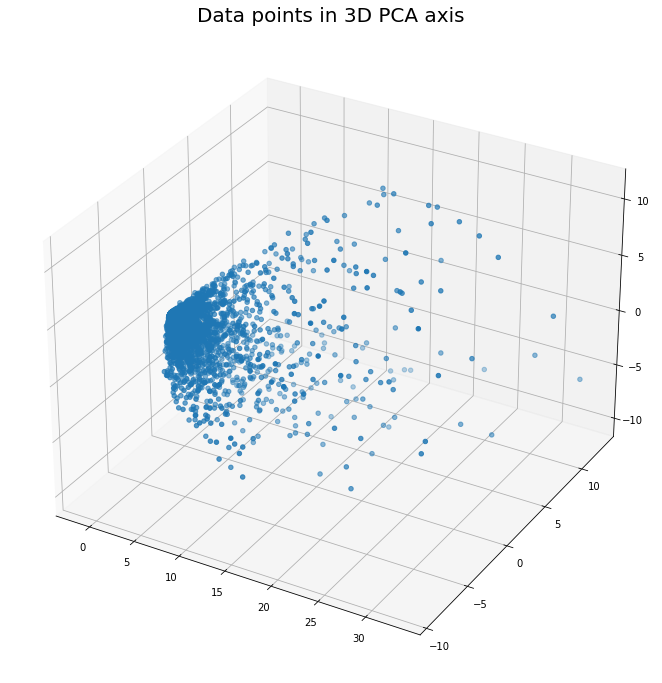

In [54]:
plt.rcParams['figure.figsize'] = (16, 9)


fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(pca_pivot[0], pca_pivot[2], pca_pivot[1])

plt.title('Data points in 3D PCA axis', fontsize=20)
plt.show()

In [97]:
pca_active_users_10Plus = PCA(n_components=550)
pca_active_users_10Plus.fit(active_users_df_10PlusRatings_partial_pivot)
pca_active_users_10Plus_array = pca_active_users_10Plus.transform(active_users_df_10PlusRatings_partial_pivot)

In [98]:
pca_active_users_10Plus.explained_variance_ratio_.sum()

0.801403621183661

In [102]:
prct = 0
cnt = 0
for i in pca_active_users_10Plus.explained_variance_ratio_:
    cnt += 1
    prct += i
    if prct>0.80:
        print(f'{cnt}, {prct}')
        break

546, 0.8001679442977649


In [100]:
pca_pivot_550 = pd.DataFrame(pca_active_users_10Plus_array)

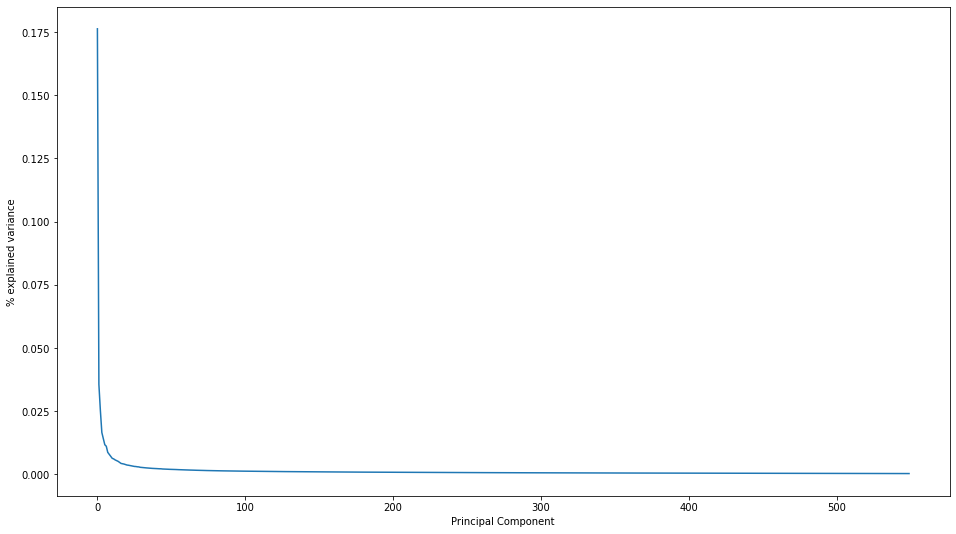

In [101]:
plt.plot(pca_active_users_10Plus.explained_variance_ratio_)
plt.xlabel('Principal Component'); plt.ylabel('% explained variance');

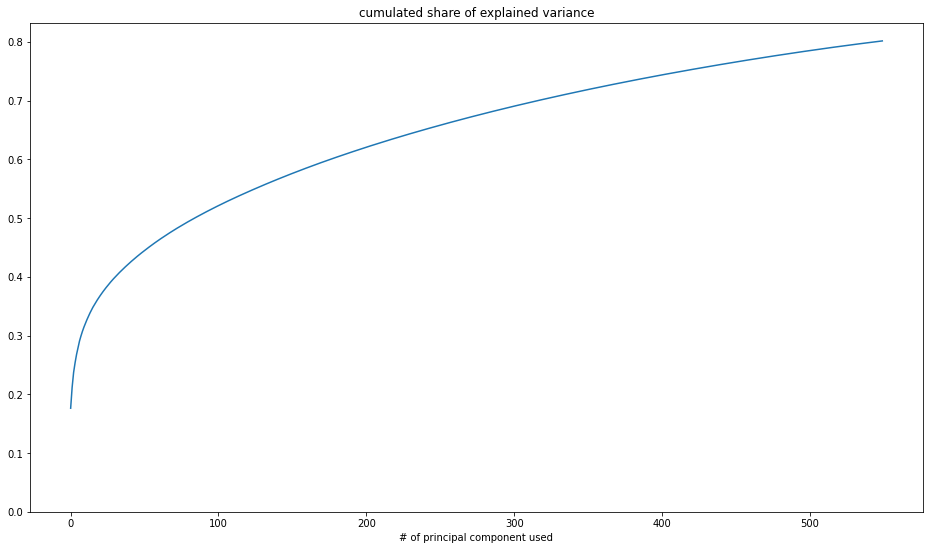

In [176]:
plt.plot(np.cumsum(pca_active_users_10Plus.explained_variance_ratio_))
plt.ylim(ymin=0)
plt.title('cumulated share of explained variance')
plt.xlabel('# of principal component used');

## KNN

### for active_users_df_10PlusRatings_partial_pivot

In [103]:
%%time

#test model knn for users
model_knn_10PlusRatings = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model_knn_10PlusRatings.fit(active_users_df_10PlusRatings_partial_pivot)

CPU times: user 234 ms, sys: 48.2 ms, total: 282 ms
Wall time: 279 ms


NearestNeighbors(algorithm='brute', metric='cosine')

### for active_users_df_10PlusRatings_partial_pivot after pca

In [104]:
%%time

#test model knn for users
model_knn_pca_10PlusRatings = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model_knn_pca_10PlusRatings.fit(pca_pivot)

CPU times: user 1.97 ms, sys: 1.08 ms, total: 3.05 ms
Wall time: 2.75 ms


NearestNeighbors(algorithm='brute', metric='cosine')

In [105]:
%%time

#test model knn for users
model_knn_pca_10PlusRatings_ = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model_knn_pca_10PlusRatings_.fit(pca_pivot_)

CPU times: user 1.51 ms, sys: 0 ns, total: 1.51 ms
Wall time: 1.44 ms


NearestNeighbors(algorithm='brute', metric='cosine')

In [106]:

%%time

#test model knn for users
model_knn_pca_550_10PlusRatings_ = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model_knn_pca_550_10PlusRatings_.fit(pca_pivot_550)

CPU times: user 14.1 ms, sys: 0 ns, total: 14.1 ms
Wall time: 10 ms


NearestNeighbors(algorithm='brute', metric='cosine')

### active_users_df_100PlusRatings_partial_pivot

In [107]:
#test model knn for users

model_knn_100PlusRatings = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model_knn_100PlusRatings.fit(active_users_df_100PlusRatings_partial_pivot)

NearestNeighbors(algorithm='brute', metric='cosine')

### rating_complete_df_10_partial_pivot

In [108]:
#test model knn for users

model_knn_complete_10PlusRatings = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model_knn_complete_10PlusRatings.fit(rating_complete_df_10PlusRatings_partial_pivot)

NearestNeighbors(algorithm='brute', metric='cosine')

### rating_complete_df_100_partial_pivot

In [109]:

model_knn_complete_100PlusRatings = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model_knn_complete_100PlusRatings.fit(rating_complete_df_100PlusRatings_partial_pivot)

NearestNeighbors(algorithm='brute', metric='cosine')

### Predictions and comparaisons of model with index row

In [110]:
# don't forget to when the distance for knn prediction is 0.0 is probably due lack of data and 
# not an extreme proximity of the anime

In [111]:
#Chose the anime 5 who is the same on the two vectorized data
index_nb = 25
n_neighbors = 15
distances, indices = model_knn_10PlusRatings.kneighbors(active_users_df_10PlusRatings_partial_pivot.iloc[index_nb,:].values.reshape(1, -1), n_neighbors = n_neighbors)

In [112]:
active_users_df_100PlusRatings_partial_pivot.shape[0]

10166

In [113]:
anime_id_name_df_10PlusRatings.loc[25].Name

'Rurouni Kenshin: Meiji Kenkaku Romantan - Tsuioku-hen'

In [114]:
active_users_df_100PlusRatings_partial_pivot.iloc[index_nb,:].values.reshape(1, -1)

array([[0., 0., 0., ..., 0., 0., 0.]])

In [115]:
#10PlusRatings
for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendations for {0}:\n'.format(active_users_df_10PlusRatings_partial_pivot.index[index_nb]))
    else:
        print('{0}: {1}, with distance of {2}:'.format(i, active_users_df_10PlusRatings_partial_pivot.index[indices.flatten()[i]], distances.flatten()[i]))

Recommendations for 44:

1: 401, with distance of 0.35845107042250957:
2: 45, with distance of 0.4412344920491553:
3: 46, with distance of 0.5198177735481421:
4: 205, with distance of 0.630682291111423:
5: 164, with distance of 0.6514185282119336:
6: 1, with distance of 0.6532132499033738:
7: 6, with distance of 0.6594495192648324:
8: 11441, with distance of 0.6777024884985369:
9: 72, with distance of 0.6832907565108806:
10: 5, with distance of 0.6833175351648948:
11: 267, with distance of 0.6848829520995819:
12: 2418, with distance of 0.6856527651060023:
13: 33, with distance of 0.6876457091619872:
14: 1818, with distance of 0.6882241799505109:


In [116]:
distances, indices = model_knn_10PlusRatings.kneighbors(active_users_df_10PlusRatings_partial_pivot.iloc[index_nb,:].values.reshape(1, -1), n_neighbors = n_neighbors)

In [117]:
anime_id_name_df_10PlusRatings.query('anime_id == 44')

,anime_id,Name
25,44,Rurouni Kenshin: Meiji Kenkaku Romantan - Tsui...


In [118]:
# How to obtain the nma of the anime from is anime_id
anime_id_name_df_10PlusRatings.query('anime_id == 44').iloc[0].Name

'Rurouni Kenshin: Meiji Kenkaku Romantan - Tsuioku-hen'

In [119]:
print(anime_id_name_df_10PlusRatings.query('anime_id == 44').iloc[0].Name)

Rurouni Kenshin: Meiji Kenkaku Romantan - Tsuioku-hen


In [120]:
nb = 44
anime_id_name_df_10PlusRatings.query(f'anime_id == {nb}').iloc[0].Name

'Rurouni Kenshin: Meiji Kenkaku Romantan - Tsuioku-hen'

In [121]:
#10PlusRatings list
distances, indices = model_knn_10PlusRatings.kneighbors(active_users_df_10PlusRatings_partial_pivot.iloc[index_nb,:].values.reshape(1, -1), n_neighbors = n_neighbors)

prediction_10PlusRatings = []
for i in range(0, len(distances.flatten())):
    if i == 0:
        prediction_10PlusRatings.append([active_users_df_10PlusRatings_partial_pivot.index[indices.flatten()[i]],0])
    else:
        prediction_10PlusRatings.append([active_users_df_10PlusRatings_partial_pivot.index[indices.flatten()[i]],distances.flatten()[i]])

for i in range(len(prediction_10PlusRatings)):
    anime_name = anime_id_name_df_10PlusRatings.query(f'anime_id == {prediction_10PlusRatings[i][0]}').iloc[0].Name
    distance = prediction_10PlusRatings[i][1]
    if i == 0:
        print(f'Recommendations for {anime_name}:')
    else:
        print(f'{anime_name}, with distance of {distance}')

Recommendations for Rurouni Kenshin: Meiji Kenkaku Romantan - Tsuioku-hen:
Rurouni Kenshin: Meiji Kenkaku Romantan - Seisou-hen, with distance of 0.35845107042250957
Rurouni Kenshin: Meiji Kenkaku Romantan, with distance of 0.4412344920491553
Rurouni Kenshin: Meiji Kenkaku Romantan - Ishinshishi e no Chinkonka, with distance of 0.5198177735481421
Samurai Champloo, with distance of 0.630682291111423
Mononoke Hime, with distance of 0.6514185282119336
Cowboy Bebop, with distance of 0.6532132499033738
Trigun, with distance of 0.6594495192648324
Rurouni Kenshin: Meiji Kenkaku Romantan - Shin Kyoto-hen, with distance of 0.6777024884985369
Full Metal Panic? Fumoffu, with distance of 0.6832907565108806
Cowboy Bebop: Tengoku no Tobira, with distance of 0.6833175351648948
Gungrave, with distance of 0.6848829520995819
Stranger: Mukou Hadan, with distance of 0.6856527651060023
Kenpuu Denki Berserk, with distance of 0.6876457091619872
Claymore, with distance of 0.6882241799505109


In [122]:
anime_id_name_df_10PlusRatings.query(f'anime_id == {prediction_10PlusRatings[0][0]}').iloc[0].Name

'Rurouni Kenshin: Meiji Kenkaku Romantan - Tsuioku-hen'

In [123]:
prediction_10PlusRatings[0][0]

44

In [124]:
#100PlusRatings list
distances, indices = model_knn_100PlusRatings.kneighbors(active_users_df_100PlusRatings_partial_pivot.iloc[index_nb,:].values.reshape(1, -1), n_neighbors = n_neighbors)
prediction_100PlusRatings = []
for i in range(len(distances.flatten())):
    if i == 0:
        prediction_100PlusRatings.append([active_users_df_100PlusRatings_partial_pivot.index[indices.flatten()[i]],0])
    else:
        prediction_100PlusRatings.append([active_users_df_100PlusRatings_partial_pivot.index[indices.flatten()[i]],distances.flatten()[i]])

for i in range(len(prediction_100PlusRatings)):
    anime_name = anime_id_name_df_100PlusRatings.query(f'anime_id == {prediction_100PlusRatings[i][0]}').iloc[0].Name
    distance = prediction_100PlusRatings[i][1]
    if i == 0:
        print(f'Recommendations for {anime_name}:')
    else:
        print(f'{anime_name}, with distance of {distance}')

Recommendations for Rurouni Kenshin: Meiji Kenkaku Romantan - Tsuioku-hen:
Rurouni Kenshin: Meiji Kenkaku Romantan - Seisou-hen, with distance of 0.3328569482940109
Rurouni Kenshin: Meiji Kenkaku Romantan, with distance of 0.40251121186245653
Rurouni Kenshin: Meiji Kenkaku Romantan - Ishinshishi e no Chinkonka, with distance of 0.47648033772070286
Samurai Champloo, with distance of 0.5976485135355778
Trigun, with distance of 0.6350663596971027
Full Metal Panic? Fumoffu, with distance of 0.6361281063333539
Cowboy Bebop, with distance of 0.6362672287529976
Mononoke Hime, with distance of 0.6364660462779357
Rurouni Kenshin: Meiji Kenkaku Romantan - Shin Kyoto-hen, with distance of 0.6406270910188878
Gungrave, with distance of 0.6416285075724968
Full Metal Panic!, with distance of 0.6491594950121562
Fullmetal Alchemist, with distance of 0.6537517787465945
Cowboy Bebop: Tengoku no Tobira, with distance of 0.6546939282738695
Claymore, with distance of 0.6564810887608559


### prediction and comparaison with an anime name

In [125]:
anime_id_name_df_10PlusRatings.query('Name == "Naruto"')

,anime_id,Name
10,20,Naruto


In [126]:
n_neighbors = 15

In [127]:
index_nb = anime_id_name_df_10PlusRatings.index[anime_id_name_df_10PlusRatings['Name'] == "Naruto"].tolist()[0]

In [128]:
anime_id_name_df_10PlusRatings.index[anime_id_name_df_10PlusRatings['Name'] == "Naruto"].tolist()[0]

10

In [129]:
index_nb

10

In [130]:
#10PlusRatings list
distances, indices = model_knn_10PlusRatings.kneighbors(active_users_df_10PlusRatings_partial_pivot.iloc[index_nb,:].values.reshape(1, -1), n_neighbors = n_neighbors)

prediction_10PlusRatings = []
for i in range(0, len(distances.flatten())):
    if i == 0:
        prediction_10PlusRatings.append([active_users_df_10PlusRatings_partial_pivot.index[indices.flatten()[i]],0])
    else:
        prediction_10PlusRatings.append([active_users_df_10PlusRatings_partial_pivot.index[indices.flatten()[i]],distances.flatten()[i]])

for i in range(len(prediction_10PlusRatings)):
    anime_name = anime_id_name_df_10PlusRatings.query(f'anime_id == {prediction_10PlusRatings[i][0]}').iloc[0].Name
    distance = prediction_10PlusRatings[i][1]
    if i == 0:
        print(f'Recommendations for {anime_name}:')
    else:
        print(f'{anime_name}, with distance of {distance}')

Recommendations for Naruto:
Naruto: Shippuuden, with distance of 0.18049078542744768
Death Note, with distance of 0.32724375187989996
Bleach, with distance of 0.35922338431707146
Shingeki no Kyojin, with distance of 0.3764965221555553
Fullmetal Alchemist: Brotherhood, with distance of 0.4092187913883153
Code Geass: Hangyaku no Lelouch, with distance of 0.4141593159792041
Sword Art Online, with distance of 0.4145034622526954
One Piece, with distance of 0.4324693299705893
Fairy Tail, with distance of 0.43374727465720364
One Punch Man, with distance of 0.440672137299862
Code Geass: Hangyaku no Lelouch R2, with distance of 0.44317776537599496
Tokyo Ghoul, with distance of 0.4478750610328671
Boku no Hero Academia, with distance of 0.4509773475530082
Fullmetal Alchemist, with distance of 0.45734048611945144


In [131]:
anime_id_name_df_100PlusRatings.query('Name == "Naruto"')

,anime_id,Name
10,20,Naruto


In [132]:
index_nb = anime_id_name_df_100PlusRatings.index[anime_id_name_df_100PlusRatings['Name'] == "Naruto"].tolist()[0]

In [133]:
index_nb

10

In [134]:
#100PlusRatings list
distances, indices = model_knn_100PlusRatings.kneighbors(active_users_df_100PlusRatings_partial_pivot.iloc[index_nb,:].values.reshape(1, -1), n_neighbors = n_neighbors)
prediction_100PlusRatings = []
for i in range(len(distances.flatten())):
    if i == 0:
        prediction_100PlusRatings.append([active_users_df_100PlusRatings_partial_pivot.index[indices.flatten()[i]],0])
    else:
        prediction_100PlusRatings.append([active_users_df_100PlusRatings_partial_pivot.index[indices.flatten()[i]],distances.flatten()[i]])

for i in range(len(prediction_100PlusRatings)):
    anime_name = anime_id_name_df_100PlusRatings.query(f'anime_id == {prediction_100PlusRatings[i][0]}').iloc[0].Name
    distance = prediction_100PlusRatings[i][1]
    if i == 0:
        print(f'Recommendations for {anime_name}:')
    else:
        print(f'{anime_name}, with distance of {distance}')

Recommendations for Naruto:
Naruto: Shippuuden, with distance of 0.15516967217154098
Death Note, with distance of 0.2848835714687844
Bleach, with distance of 0.3062895355389935
Shingeki no Kyojin, with distance of 0.3096722585912892
Fullmetal Alchemist: Brotherhood, with distance of 0.33893160478466666
Sword Art Online, with distance of 0.3441087305135756
Code Geass: Hangyaku no Lelouch, with distance of 0.34628972989226114
Fairy Tail, with distance of 0.36947365607179394
One Punch Man, with distance of 0.3703646722889954
Code Geass: Hangyaku no Lelouch R2, with distance of 0.37518298931842753
Tokyo Ghoul, with distance of 0.3781145278685727
Boku no Hero Academia, with distance of 0.38078608955757987
One Piece, with distance of 0.3850372607381153
Ao no Exorcist, with distance of 0.3885017578704081


In [135]:
anime_id_name_df_10PlusRatings.query('Name == "Mushishi"')

,anime_id,Name
417,457,Mushishi


In [136]:
anime_id_name_df_10PlusRatings.query('Name == "Beck"')

,anime_id,Name
38,57,Beck


In [137]:
index_nb = anime_id_name_df_10PlusRatings.index[anime_id_name_df_10PlusRatings['Name'] == "Beck"].tolist()[0]

In [138]:
#10PlusRatings list
distances, indices = model_knn_10PlusRatings.kneighbors(active_users_df_10PlusRatings_partial_pivot.iloc[index_nb,:].values.reshape(1, -1), n_neighbors = n_neighbors)

prediction_10PlusRatings = []
for i in range(0, len(distances.flatten())):
    if i == 0:
        prediction_10PlusRatings.append([active_users_df_10PlusRatings_partial_pivot.index[indices.flatten()[i]],0])
    else:
        prediction_10PlusRatings.append([active_users_df_10PlusRatings_partial_pivot.index[indices.flatten()[i]],distances.flatten()[i]])

for i in range(len(prediction_10PlusRatings)):
    anime_name = anime_id_name_df_10PlusRatings.query(f'anime_id == {prediction_10PlusRatings[i][0]}').iloc[0].Name
    distance = prediction_10PlusRatings[i][1]
    if i == 0:
        print(f'Recommendations for {anime_name}:')
    else:
        print(f'{anime_name}, with distance of {distance}')

Recommendations for Beck:
Great Teacher Onizuka, with distance of 0.591790310143734
Samurai Champloo, with distance of 0.6302206837978148
NHK ni Youkoso!, with distance of 0.6316961419796813
Black Lagoon, with distance of 0.6395070997045907
Nodame Cantabile, with distance of 0.640647768986048
Genshiken, with distance of 0.6516668110520863
FLCL, with distance of 0.6545938058916254
Detroit Metal City, with distance of 0.6567941462705711
Koukyoushihen Eureka Seven, with distance of 0.6586769660066759
Code Geass: Hangyaku no Lelouch, with distance of 0.6617284015963658
Bakuman., with distance of 0.6629083622746548
Cowboy Bebop, with distance of 0.6641822790017817
Nana, with distance of 0.666763563661467
Baccano!, with distance of 0.6669511482014431


In [139]:
index_nb = anime_id_name_df_100PlusRatings.index[anime_id_name_df_100PlusRatings['Name'] == "Beck"].tolist()[0]

In [140]:
#100PlusRatings list
distances, indices = model_knn_100PlusRatings.kneighbors(active_users_df_100PlusRatings_partial_pivot.iloc[index_nb,:].values.reshape(1, -1), n_neighbors = n_neighbors)
prediction_100PlusRatings = []
for i in range(len(distances.flatten())):
    if i == 0:
        prediction_100PlusRatings.append([active_users_df_100PlusRatings_partial_pivot.index[indices.flatten()[i]],0])
    else:
        prediction_100PlusRatings.append([active_users_df_100PlusRatings_partial_pivot.index[indices.flatten()[i]],distances.flatten()[i]])

for i in range(len(prediction_100PlusRatings)):
    anime_name = anime_id_name_df_100PlusRatings.query(f'anime_id == {prediction_100PlusRatings[i][0]}').iloc[0].Name
    distance = prediction_100PlusRatings[i][1]
    if i == 0:
        print(f'Recommendations for {anime_name}:')
    else:
        print(f'{anime_name}, with distance of {distance}')

Recommendations for Beck:
Great Teacher Onizuka, with distance of 0.5543059059762561
NHK ni Youkoso!, with distance of 0.5855015252415916
Samurai Champloo, with distance of 0.6025232343668067
Black Lagoon, with distance of 0.6040858467601
Nodame Cantabile, with distance of 0.6046246225282129
FLCL, with distance of 0.618604133128144
Fullmetal Alchemist, with distance of 0.6188701456381132
Genshiken, with distance of 0.6226827259096492
Black Lagoon: The Second Barrage, with distance of 0.6254898956891575
Death Note, with distance of 0.6255588548621807
Elfen Lied, with distance of 0.6270899600719408
Nana, with distance of 0.6277005139940497
Detroit Metal City, with distance of 0.6298809083862615
Code Geass: Hangyaku no Lelouch, with distance of 0.63031025510769


In [141]:
# the model give response that are coherent

### Create fonction for using the model

In [142]:
def recomendation_100PlusRatings(anime_name, nb_recomendation = 10):
    index_nb = anime_name_df.index[anime_name_df['Name'] == anime_name].tolist()[0]
    distances, indices = model_knn_100PlusRatings.kneighbors(active_users_df_100PlusRatings_partial_pivot.iloc[index_nb,:].values.reshape(1, -1), n_neighbors = nb_recomendation+1)
    
    prediction = []
    for i in range(len(distances.flatten())):
        if i == 0:
            prediction.append([active_users_df_100PlusRatings_partial_pivot.index[indices.flatten()[i]],0])
        else:
            prediction.append([active_users_df_100PlusRatings_partial_pivot.index[indices.flatten()[i]],distances.flatten()[i]])
    results = []
    for i in range(len(prediction)):
        anime_name = anime_name_df.query(f'anime_id == {prediction[i][0]}').iloc[0].Name
        distance = prediction[i][1]
        results.append([anime_name,distance])
    return results

In [143]:
def recomendation_10PlusRatings(anime_name, nb_recomendation = 10):
    index_nb = anime_name_df.index[anime_name_df['Name'] == anime_name].tolist()[0]
    distances, indices = model_knn_10PlusRatings.kneighbors(active_users_df_10PlusRatings_partial_pivot.iloc[index_nb,:].values.reshape(1, -1), n_neighbors = nb_recomendation + 1)

    prediction = []
    for i in range(0, len(distances.flatten())):
        if i == 0:
            prediction.append([active_users_df_10PlusRatings_partial_pivot.index[indices.flatten()[i]],0])
        else:
            prediction.append([active_users_df_10PlusRatings_partial_pivot.index[indices.flatten()[i]],distances.flatten()[i]])
    results = []
    for i in range(len(prediction)):
        anime_name = anime_name_df.query(f'anime_id == {prediction[i][0]}').iloc[0].Name
        distance = prediction[i][1]
        results.append([anime_name,distance])
    return results

In [144]:
active_users_df_10PlusRatings_partial_pivot.index[indices.flatten()[0]]

57

In [145]:
active_users_df_10PlusRatings_partial_pivot.index[indices.flatten()]

Int64Index([57, 245, 1210, 205, 889, 1698, 227, 121, 240, 1519, 1535, 226, 877,
            3692, 1575],
           dtype='int64', name='anime_id')

In [146]:
indices.flatten()

array([  38,  213, 1067,  180,  776, 1466,  195,  100,  208, 1312, 1326,
        194,  764, 2763, 1362])

In [147]:
recomendation_100PlusRatings('Naruto')

[['Naruto', 0],
 ['Naruto: Shippuuden', 0.15516967217154098],
 ['Death Note', 0.2848835714687844],
 ['Bleach', 0.3062895355389935],
 ['Shingeki no Kyojin', 0.3096722585912892],
 ['Fullmetal Alchemist: Brotherhood', 0.33893160478466666],
 ['Sword Art Online', 0.3441087305135756],
 ['Code Geass: Hangyaku no Lelouch', 0.34628972989226114],
 ['Fairy Tail', 0.36947365607179394],
 ['One Punch Man', 0.3703646722889954],
 ['Code Geass: Hangyaku no Lelouch R2', 0.37518298931842753]]

In [148]:
recomendation_10PlusRatings('Naruto')

[['Naruto', 0],
 ['Naruto: Shippuuden', 0.18049078542744768],
 ['Death Note', 0.32724375187989996],
 ['Bleach', 0.35922338431707146],
 ['Shingeki no Kyojin', 0.3764965221555553],
 ['Fullmetal Alchemist: Brotherhood', 0.4092187913883153],
 ['Code Geass: Hangyaku no Lelouch', 0.4141593159792041],
 ['Sword Art Online', 0.4145034622526954],
 ['One Piece', 0.4324693299705893],
 ['Fairy Tail', 0.43374727465720364],
 ['One Punch Man', 0.440672137299862]]

In [149]:
def recomendation_completed_10PlusRatings(anime_name, nb_recomendation = 10):
    index_nb = anime_name_df.index[anime_name_df['Name'] == anime_name].tolist()[0]
    distances, indices = model_knn_complete_10PlusRatings.kneighbors(rating_complete_df_10PlusRatings_partial_pivot.iloc[index_nb,:].values.reshape(1, -1), n_neighbors = nb_recomendation + 1)

    prediction = []
    for i in range(0, len(distances.flatten())):
        if i == 0:
            prediction.append([rating_complete_df_10PlusRatings_partial_pivot.index[indices.flatten()[i]],0])
        else:
            prediction.append([rating_complete_df_10PlusRatings_partial_pivot.index[indices.flatten()[i]],distances.flatten()[i]])
    results = []
    for i in range(len(prediction)):
        anime_name = anime_name_df.query(f'anime_id == {prediction[i][0]}').iloc[0].Name
        distance = prediction[i][1]
        results.append([anime_name,distance])
    return results

In [150]:
def recomendation_completed_100PlusRatings(anime_name, nb_recomendation = 10):
    index_nb = anime_name_df.index[anime_name_df['Name'] == anime_name].tolist()[0]
    distances, indices = model_knn_complete_100PlusRatings.kneighbors(rating_complete_df_100PlusRatings_partial_pivot.iloc[index_nb,:].values.reshape(1, -1), n_neighbors = nb_recomendation + 1)

    prediction= []
    for i in range(0, len(distances.flatten())):
        if i == 0:
            prediction.append([rating_complete_df_100PlusRatings_partial_pivot.index[indices.flatten()[i]],0])
        else:
            prediction.append([rating_complete_df_100PlusRatings_partial_pivot.index[indices.flatten()[i]],distances.flatten()[i]])
    results = []
    for i in range(len(prediction)):
        anime_name = anime_name_df.query(f'anime_id == {prediction[i][0]}').iloc[0].Name
        distance = prediction[i][1]
        results.append([anime_name,distance])
    return results

In [151]:
recomendation_completed_10PlusRatings('Naruto')

[['Naruto', 0],
 ['Death Note', 0.35472062005651495],
 ['Naruto: Shippuuden', 0.3748409817880938],
 ['Shingeki no Kyojin', 0.3922544466468775],
 ['Code Geass: Hangyaku no Lelouch', 0.42450733950923025],
 ['Sword Art Online', 0.42571517625874866],
 ['Fullmetal Alchemist: Brotherhood', 0.42990812561893743],
 ['Code Geass: Hangyaku no Lelouch R2', 0.44464392571874023],
 ['One Punch Man', 0.44527795583016394],
 ['Tokyo Ghoul', 0.4539639315265106],
 ['Boku no Hero Academia', 0.45976520632968665]]

In [152]:
recomendation_completed_100PlusRatings('Naruto')

[['Naruto', 0],
 ['Death Note', 0.30606058679364234],
 ['Shingeki no Kyojin', 0.33150840658690084],
 ['Naruto: Shippuuden', 0.33281109743113657],
 ['Sword Art Online', 0.35392714729298],
 ['Code Geass: Hangyaku no Lelouch', 0.366832270141216],
 ['Fullmetal Alchemist: Brotherhood', 0.3695876076470451],
 ['One Punch Man', 0.38298269980655464],
 ['Tokyo Ghoul', 0.3881276129545641],
 ['Code Geass: Hangyaku no Lelouch R2', 0.3896777611876161],
 ['Boku no Hero Academia', 0.39285816646421867]]

In [153]:
def recomendation_10PlusRatings_pca(anime_name, nb_recomendation = 10):
    index_nb = anime_name_df.index[anime_name_df['Name'] == anime_name].tolist()[0]
    distances, indices = model_knn_pca_10PlusRatings.kneighbors(pca_pivot.iloc[index_nb,:].values.reshape(1, -1), n_neighbors = nb_recomendation + 1)

    prediction = []
    for i in range(0, len(distances.flatten())):
        if i == 0:
            prediction.append([pca_pivot.index[indices.flatten()[i]],0])
        else:
            prediction.append([pca_pivot.index[indices.flatten()[i]],distances.flatten()[i]])
    results = []
    for i in range(len(prediction)):
        anime_name = anime_id_name_df_10PlusRatings.iloc[prediction[i][0]].Name
        distance = prediction[i][1]
        results.append([anime_name,distance])
    return results

In [154]:
def recomendation_10PlusRatings_pca_(anime_name, nb_recomendation = 10):
    index_nb = anime_name_df.index[anime_name_df['Name'] == anime_name].tolist()[0]
    distances, indices = model_knn_pca_10PlusRatings_.kneighbors(pca_pivot_.iloc[index_nb,:].values.reshape(1, -1), n_neighbors = nb_recomendation + 1)

    prediction = []
    for i in range(0, len(distances.flatten())):
        if i == 0:
            prediction.append([pca_pivot_.index[indices.flatten()[i]],0])
        else:
            prediction.append([pca_pivot_.index[indices.flatten()[i]],distances.flatten()[i]])
    results = []
    for i in range(len(prediction)):
        anime_name = anime_name_df.query(f'anime_id == {prediction[i][0]}').iloc[0].Name
        distance = prediction[i][1]
        results.append([anime_name,distance])
    return results

In [155]:
recomendation_10PlusRatings_pca('Naruto')

[['Naruto', 0],
 ['Fullmetal Alchemist: Brotherhood', 0.00027748927918080923],
 ['Free!', 0.0004866730146159126],
 ['Diabolik Lovers', 0.00070412456411173],
 ['Donten ni Warau', 0.0011186790840188587],
 ['Hotarubi no Mori e', 0.0011587811629011346],
 ["Gintama': Enchousen", 0.0011967656689284567],
 ['Death Billiards', 0.0014564472386688898],
 ['Death Note', 0.0015985466590370256],
 ['Ookami Kodomo no Ame to Yuki', 0.0026842782572471524],
 ['Hajime no Ippo: Rising', 0.0031624586215298622]]

In [156]:
recomendation_10PlusRatings_pca_('Naruto')

[['Naruto', 0],
 ['Fullmetal Alchemist: Brotherhood', 0.00027748927918080923],
 ['Free!', 0.0004866730146159126],
 ['Diabolik Lovers', 0.00070412456411173],
 ['Donten ni Warau', 0.0011186790840188587],
 ['Hotarubi no Mori e', 0.0011587811629011346],
 ["Gintama': Enchousen", 0.0011967656689284567],
 ['Death Billiards', 0.0014564472386688898],
 ['Death Note', 0.0015985466590370256],
 ['Ookami Kodomo no Ame to Yuki', 0.0026842782572471524],
 ['Hajime no Ippo: Rising', 0.0031624586215298622]]

In [ ]:
model_knn_pca_550_10PlusRatings_.fit(pca_pivot_550)

In [172]:
def recomendation_10PlusRatings_pca_550(anime_name, nb_recomendation = 10):
    index_nb = anime_name_df.index[anime_name_df['Name'] == anime_name].tolist()[0]
    distances, indices = model_knn_pca_550_10PlusRatings_.kneighbors(pca_pivot_550.iloc[index_nb,:].values.reshape(1, -1), n_neighbors = nb_recomendation + 1)

    prediction = []
    for i in range(0, len(distances.flatten())):
        if i == 0:
            prediction.append([pca_pivot_550.index[indices.flatten()[i]],0])
        else:
            prediction.append([pca_pivot_550.index[indices.flatten()[i]],distances.flatten()[i]])
    results = []
    for i in range(len(prediction)):
        anime_name = anime_id_name_df_10PlusRatings.iloc[prediction[i][0]].Name
        distance = prediction[i][1]
        results.append([anime_name,distance])
    return results

In [173]:
recomendation_10PlusRatings_pca_550('Naruto')

[['Naruto', 0],
 ['Naruto: Shippuuden', 0.14919006907191767],
 ['Death Note', 0.3334279210554395],
 ['Bleach', 0.36632085683715176],
 ['Shingeki no Kyojin', 0.3847863279046517],
 ['Fullmetal Alchemist: Brotherhood', 0.421174678556018],
 ['Code Geass: Hangyaku no Lelouch', 0.4226056474512617],
 ['Sword Art Online', 0.4242502090701421],
 ['Fairy Tail', 0.44286542876115653],
 ['One Piece', 0.44411705011249003],
 ['Code Geass: Hangyaku no Lelouch R2', 0.4517314324834584]]

### fonction for comparison all model

In [166]:
np.array(recomendation_100PlusRatings('Naruto'))[:,0]

array(['Naruto', 'Naruto: Shippuuden', 'Death Note', 'Bleach',
       'Shingeki no Kyojin', 'Fullmetal Alchemist: Brotherhood',
       'Sword Art Online', 'Code Geass: Hangyaku no Lelouch',
       'Fairy Tail', 'One Punch Man',
       'Code Geass: Hangyaku no Lelouch R2'], dtype='<U34')

In [167]:
Naruto_10PlusRatings = np.array(recomendation_10PlusRatings('Naruto'))[:,0]
Naruto_100PlusRatings = np.array(recomendation_100PlusRatings('Naruto'))[:,0]
Naruto_completed_10PlusRatings = np.array(recomendation_completed_10PlusRatings('Naruto'))[:,0]
Naruto_completed_100PlusRatings = np.array(recomendation_completed_100PlusRatings('Naruto'))[:,0]

In [168]:
list(Naruto_10PlusRatings)

['Naruto',
 'Naruto: Shippuuden',
 'Death Note',
 'Bleach',
 'Shingeki no Kyojin',
 'Fullmetal Alchemist: Brotherhood',
 'Code Geass: Hangyaku no Lelouch',
 'Sword Art Online',
 'One Piece',
 'Fairy Tail',
 'One Punch Man']

In [169]:
pd.DataFrame(list(zip(list(Naruto_10PlusRatings), list(Naruto_100PlusRatings),list(Naruto_completed_10PlusRatings),list(Naruto_completed_100PlusRatings))), columns =['10PlusRatings', '100PlusRatings','completed_10PlusRatings', 'completed_100PlusRatings'])

,10PlusRatings,100PlusRatings,completed_10PlusRatings,completed_100PlusRatings
0,Naruto,Naruto,Naruto,Naruto
1,Naruto: Shippuuden,Naruto: Shippuuden,Death Note,Death Note
2,Death Note,Death Note,Naruto: Shippuuden,Shingeki no Kyojin
3,Bleach,Bleach,Shingeki no Kyojin,Naruto: Shippuuden
4,Shingeki no Kyojin,Shingeki no Kyojin,Code Geass: Hangyaku no Lelouch,Sword Art Online
5,Fullmetal Alchemist: Brotherhood,Fullmetal Alchemist: Brotherhood,Sword Art Online,Code Geass: Hangyaku no Lelouch
6,Code Geass: Hangyaku no Lelouch,Sword Art Online,Fullmetal Alchemist: Brotherhood,Fullmetal Alchemist: Brotherhood
7,Sword Art Online,Code Geass: Hangyaku no Lelouch,Code Geass: Hangyaku no Lelouch R2,One Punch Man
8,One Piece,Fairy Tail,One Punch Man,Tokyo Ghoul
9,Fairy Tail,One Punch Man,Tokyo Ghoul,Code Geass: Hangyaku no Lelouch R2


In [174]:
def compare(anime_name, nb_recomendation = 10):
    _10PlusRatings = np.array(recomendation_10PlusRatings(anime_name, nb_recomendation ))[:,0]
    _100PlusRatings = np.array(recomendation_100PlusRatings(anime_name, nb_recomendation ))[:,0]
    completed_10Plus = np.array(recomendation_completed_10PlusRatings(anime_name, nb_recomendation ))[:,0]
    completed_100Plus = np.array(recomendation_completed_100PlusRatings(anime_name, nb_recomendation ))[:,0]
    _10PlusRatings_pca_550 = np.array(recomendation_10PlusRatings_pca_550(anime_name, nb_recomendation = 10))[:,0]
    return pd.DataFrame(list(zip(list(_10PlusRatings), list(_100PlusRatings),list(completed_10Plus),list(completed_100Plus),list(_10PlusRatings_pca_550))), columns =['10PlusRatings', '100PlusRatings','completed_10Plus', 'completed_100Plus', '10PlusRatings_pca_550'])

In [175]:
compare('Naruto')

,10PlusRatings,100PlusRatings,completed_10Plus,completed_100Plus,10PlusRatings_pca_550
0,Naruto,Naruto,Naruto,Naruto,Naruto
1,Naruto: Shippuuden,Naruto: Shippuuden,Death Note,Death Note,Naruto: Shippuuden
2,Death Note,Death Note,Naruto: Shippuuden,Shingeki no Kyojin,Death Note
3,Bleach,Bleach,Shingeki no Kyojin,Naruto: Shippuuden,Bleach
4,Shingeki no Kyojin,Shingeki no Kyojin,Code Geass: Hangyaku no Lelouch,Sword Art Online,Shingeki no Kyojin
5,Fullmetal Alchemist: Brotherhood,Fullmetal Alchemist: Brotherhood,Sword Art Online,Code Geass: Hangyaku no Lelouch,Fullmetal Alchemist: Brotherhood
6,Code Geass: Hangyaku no Lelouch,Sword Art Online,Fullmetal Alchemist: Brotherhood,Fullmetal Alchemist: Brotherhood,Code Geass: Hangyaku no Lelouch
7,Sword Art Online,Code Geass: Hangyaku no Lelouch,Code Geass: Hangyaku no Lelouch R2,One Punch Man,Sword Art Online
8,One Piece,Fairy Tail,One Punch Man,Tokyo Ghoul,Fairy Tail
9,Fairy Tail,One Punch Man,Tokyo Ghoul,Code Geass: Hangyaku no Lelouch R2,One Piece
